In [9]:
string =r'''<?xml version='1.0' encoding='utf-8'?><usrconfig><usr>Sarvagya Singh</usr><usr>18/12/2002</usr><usr>Mumbai Maharashtra</usr><usr>photo1.jpg</usr></usrconfig>'''

In [6]:
import pandas as pd
from PIL import Image, ImageDraw, ImageFont
from cryptography.fernet import Fernet
import xml.etree.ElementTree as ET
import qrcode
import cv2
from pyzbar.pyzbar import decode
import numpy as np

In [3]:
data1 = {'Name':['Sarvagya Singh'],'DOB':["18/12/2002"]}
df = pd.DataFrame(data1)
df

,Name,DOB
0,Sarvagya Singh,18/12/2002


In [13]:
# df.iloc[0].values aise values data me dena h
# key = Fernet.generate_key()
# print(key)
# fernet = Fernet(key)
def uuid_maker(data1):
    
    '''
    data1: list of data
    '''
    users_list = data1
    usrconfig = ET.Element("usrconfig")
    # create sub element
    usrconfig = ET.SubElement(usrconfig, "usrconfig")
    # insert list element into sub elements
    for user in range(len(users_list)):
        usr = ET.SubElement(usrconfig, "usr")
        usr.text = str(users_list[user])
    tree = ET.ElementTree(usrconfig)
    # write the tree into an XML file
    tree.write("Output.xml", encoding ='utf-8', xml_declaration = True)
    with open('Output.xml', 'r') as f:
        message = f.read()
#     message = bytes(message,'utf-8')
#     print(message)
    font1 = ImageFont.truetype("OpenSans-Semibold.ttf", size=45)
    font2 = ImageFont.truetype("OpenSans-Semibold.ttf", size=55)
    

    
    # made the QRcode for encoded data
    # define the string to encode as a QR code
#     string = r'''<?xml version='1.0' encoding='utf-8'?><usrconfig><usr>Sarvagya Singh</usr><usr>18/12/2002</usr><usr>Mumbai Maharashtra</usr><usr>photo1.jpg</usr></usrconfig>'''

    # create a QR code instance
    qr = qrcode.QRCode(version=None, error_correction=qrcode.constants.ERROR_CORRECT_L, box_size=10, border=4)
    # add the data to the QR code instance
    qr.add_data(message)
    # make the QR code
    qr.make(fit=True)
    # create an image from the QR code instance
    img = qr.make_image(fill_color="black", back_color="white")
    # display the image
    img.save("EncodedQR.png")
    
    
    # added data on template     
    template = Image.open("uuid_template.png")
    pic = Image.open(f"{data1[2]}").resize((265, 360), Image.ANTIALIAS)
    template.paste(pic, (35, 90, 300, 450))
    draw = ImageDraw.Draw(template)
    draw.text((540, 310), str(data1[1]), font=font1, fill='black')
    draw.text((480, 200), data1[0], font=font2, fill='black')
    pic = Image.open(f"EncodedQR.png").resize((200, 200), Image.ANTIALIAS)

    template.paste(pic, (550, 390,750,590))
    draw = ImageDraw.Draw(template)
    
    #     Saving the file
    templated = cv2.cvtColor(np.array(template), cv2.COLOR_BGR2RGB)
    cv2.imwrite('final_image.png',templated)
    decoded = decode(template)
    # print the decoded data
    print(decoded[0].data.decode())
    return template

['Sarvagya Singh', '18/12/2002', 'photo1.jpg']
<?xml version='1.0' encoding='utf-8'?>
<usrconfig><usr>Sarvagya Singh</usr><usr>18/12/2002</usr><usr>photo1.jpg</usr></usrconfig>


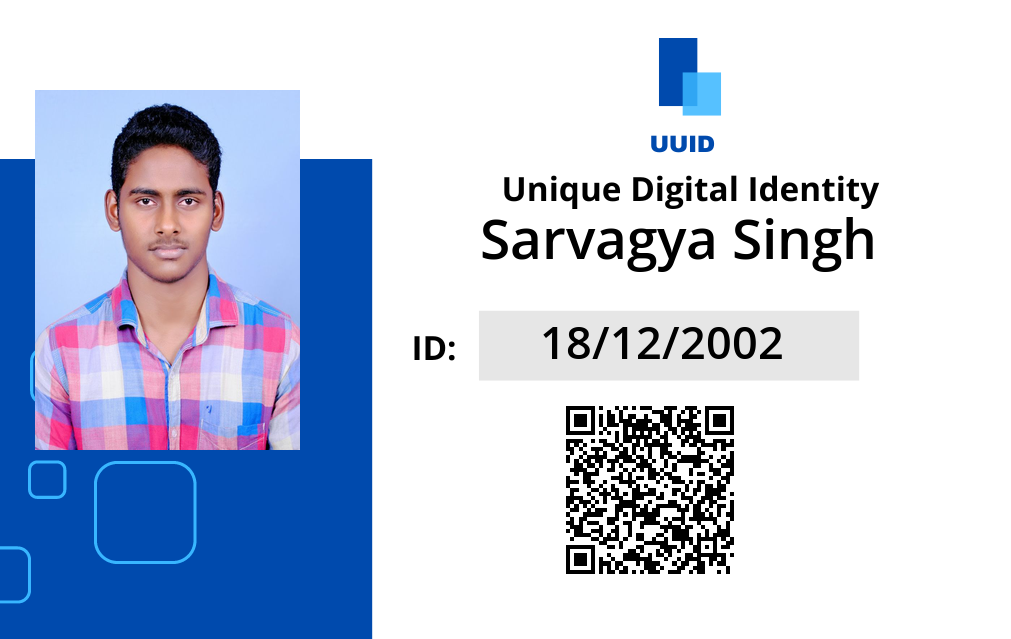

In [14]:
data = list(df.iloc[0].values)
data.append("photo1.jpg")
print(data)

final_image = uuid_maker(data)
final_image

In [16]:
def qrcode_decoder(img):
    img = np.array(img)
    decoded = decode(img)
    cropped_image = img[390:590,550:750]
    cv2.imshow('new',cropped_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
#     print(decoded[0].data.decode())
    return decoded[0].data.decode()

img = cv2.imread("final_image.png")
data_qr = qrcode_decoder(img)
print(data_qr)

<?xml version='1.0' encoding='utf-8'?>
<usrconfig><usr>Sarvagya Singh</usr><usr>18/12/2002</usr><usr>photo1.jpg</usr></usrconfig>
